In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('/Users/macbook/Desktop/Tazetdinov_Pavel_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()  # посмотрим на то есть ли в переменных пропуски

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропусков нет. 

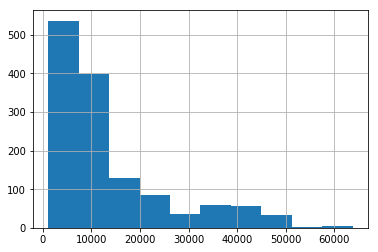

In [6]:
data.charges.hist() #очень большой хвост

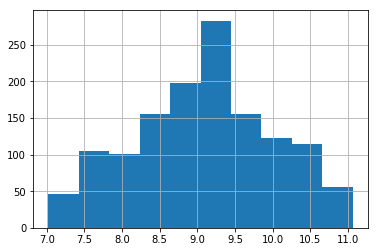

In [7]:
data ['charges'] = np.log(data ['charges'])
data.charges.hist() #теперь красиво 

In [8]:
#  кодируем пол, регион и smoker в dummy
sex = pd.get_dummies(data.sex,dummy_na=True,prefix='sex')
re = pd.get_dummies(data.region,dummy_na=True,prefix='reg')
sm = pd.get_dummies(data.smoker,dummy_na=True,prefix='sm')
data = pd.concat([data,sex,re,sm],axis=1)
data = data.drop(['sex','region','smoker','sex_nan','reg_nan','sm_nan'],axis=1)
data.head()

,age,bmi,children,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,sm_no,sm_yes
0,19,27.900,0,9.734176,1,0,0,0,0,1,0,1
1,18,33.770,1,7.453302,0,1,0,0,1,0,1,0
2,28,33.000,3,8.400538,0,1,0,0,1,0,1,0
3,33,22.705,0,9.998092,0,1,0,1,0,0,1,0
4,32,28.880,0,8.260197,0,1,0,1,0,0,1,0


### Комментарий
Всё верно, только не стоило кодировать и без того бинарные переменные sex и smoker, иначе у вас получились линейно зависимые столбцы :)

Выделяем тестовую часть

In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2)

y_train = data_train['charges']
y_test = data_test['charges']

X_train = data_train.drop(['charges'], axis=1)
X_test = data_test.drop(['charges'], axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(data_train[['age', 'bmi', 'children']]) 
# "Примечание: когда будете делать последнюю домашку, выждите когда мама или бабушка
# спросит а что это ты делаешь? Выдайте ей, что вы учите на трэйне скалировщик скалировать, 
# чтобы стохастический градиентый спуск быстрее обучил вашу регрессию.
# Запомнил*** +10 к самооценке

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# Применяем скалировщик к трэйну
data_train_scale = scaler.transform(data_train[['age', 'bmi', 'children']])

# Применяем скалирвощик к тесту 
data_test_scale = scaler.transform(data_test[['age', 'bmi', 'children']])

In [12]:
# Заменяем значения на роскалированные 
data_train[['age', 'bmi', 'children']] = data_train_scale
data_test[['age', 'bmi', 'children']] = data_test_scale

In [13]:
data_train.head()

,age,bmi,children,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,sm_no,sm_yes
23,-0.357753,0.208342,-0.084101,10.537465,1,0,1,0,0,0,0,1
159,0.787271,-0.459577,1.567049,9.890878,1,0,0,0,1,0,1,0
1271,-1.001829,0.627219,-0.909675,8.013611,1,0,0,1,0,0,1,0
807,-1.431213,0.968527,-0.909675,7.667103,1,0,0,1,0,0,1,0
714,-1.073393,-1.313663,-0.909675,7.806901,1,0,0,0,0,1,1,0


In [14]:
print(data_train.shape) # Посмотрим на размеры трэйна и теста 
print(data_test.shape)  

(1070, 12)
(268, 12)


In [15]:
y_train = data_train.charges 
y_test = data_test.charges 

X_train = data_train.drop('charges', axis=1).get_values()
X_test = data_test.drop('charges', axis=1).get_values()

In [16]:
from sklearn import metrics  # подгружаем метрики

In [17]:
#понеслась душа в рай

Найдем среднее для сравнения 

In [18]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([9.08192294, 9.08192294, 9.08192294, 9.08192294, 9.08192294])

MAE

In [19]:
metrics.mean_absolute_error(y_test, y_pred_naive)

0.7531691722721268

In [20]:
#возьмем экспоненту.
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

8845.554432843255

MSE

In [21]:
metrics.mean_squared_error(y_test, y_pred_naive)

0.8496751121640252

По аналогии

In [22]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

13398.690477806187

MAPE

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)  #7% уже неприятно, но не критично . 

8.359510882508966

In [24]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [25]:
print_metrics(y_test, y_pred_naive)

MAE: 8845.554432843255
RMSE: 13398.690477806187
R2: -0.008284475801801472
MAPE: 8.359510882508966


In [26]:
#  линейная регрессия

In [27]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [28]:
print_metrics(y_test,y_pred_regr)

MAE: 4659.258965394652
RMSE: 8815.891940869273
R2: 0.7275351057443527
MAPE: 3.2115989897125123


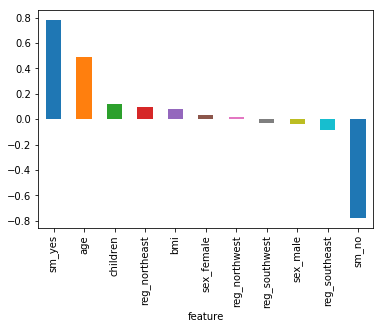

In [29]:
featureImportance = pd.DataFrame({"feature": data.drop('charges',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');  

Курение и возраст больше всего влияют на цену (что не удивительно)

поробуем лассо регрессий

In [30]:
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(X_test)

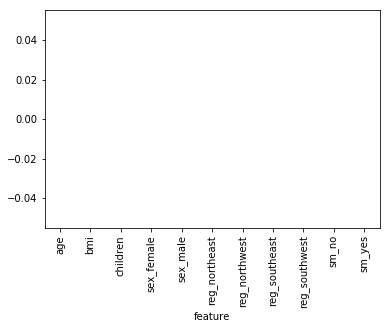

In [31]:
featureImportance = pd.DataFrame({"feature": data.drop('charges',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [32]:
print_metrics(y_test,y_pred_lasso)

MAE: 8845.554432843286
RMSE: 13398.690477806262
R2: -0.00828447580180569
MAPE: 8.359510882508983


In [33]:
#упс, что-то пошло не так)

In [34]:
#подкоректируем чутка
from sklearn.grid_search import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


/Users/macbook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/macbook/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


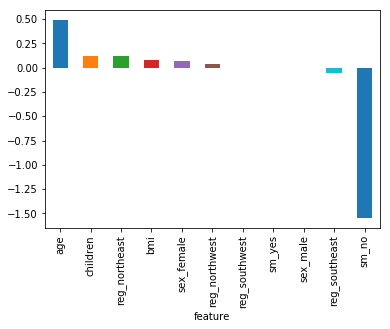

In [46]:
featureImportance = pd.DataFrame({"feature": data.drop('charges',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [47]:
print_metrics(y_test,y_pred_lasso)

MAE: 4634.0881104142045
RMSE: 8748.21394647615
R2: 0.7275378639578477
MAPE: 3.213260134312009


In [48]:
#triyng LES 

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Объявили лес из 100 деревьев
rf = RandomForestRegressor(n_estimators=10000)

# Обучили лес 
rf.fit(X_train, y_train)

# Сделали по лесу прогнозы 
y_pred_forest = rf.predict(X_test) 

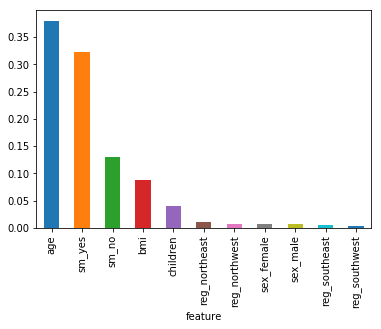

In [50]:
featureImportance = pd.DataFrame({"feature": data.drop('charges',axis=1).columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [56]:
#ЛЕС ПОКАЗАЛ, ЧТО ВОЗРАСТ- САМЫЙ ВАЖНЫЙ ПРИЗНАК

In [57]:
#подведем итоги 
#ЛЕС ЗЕ БЕСТ ФРОМ ЗЕ БЕСТ 

In [58]:
print_metrics(y_test,y_pred_naive)

MAE: 8845.554432843255
RMSE: 13398.690477806187
R2: -0.008284475801801472
MAPE: 8.359510882508966


In [59]:
print_metrics(y_test,y_pred_regr)

MAE: 4659.258965394652
RMSE: 8815.891940869273
R2: 0.7275351057443527
MAPE: 3.2115989897125123


In [60]:
print_metrics(y_test,y_pred_lasso)

MAE: 4634.0881104142045
RMSE: 8748.21394647615
R2: 0.7275378639578477
MAPE: 3.213260134312009


In [61]:
print_metrics(y_test,y_pred_forest)

MAE: 2514.4733145963287
RMSE: 5244.374953547044
R2: 0.7820981076348682
MAPE: 2.2040218592503535
